In [17]:
import qiskit as qk
import numpy as np
import matplotlib.pylab as plt

## Initialize registers and circuit:

In [18]:
reg1 = qk.QuantumRegister(2) #Quantum register nr. 1
reg2 = qk.QuantumRegister(1) #Quantum register nr. 2
clas_reg = qk.ClassicalRegister(2) #Classical register

circuit = qk.QuantumCircuit(reg1,reg2,clas_reg)

## Act on a register in the circuit with the Hadamard gate:

In [19]:
circuit.h(reg1[0]) #Hadamard transform on first qubit in reg1
#circuit.cx(reg1[0],reg1[1]) #CNOT gate
#circuit.rz(0.5,reg2[0]) # R_z gate

## Use a measurement gate on the register to measure:

In [20]:
circuit.measure(reg1,clas_reg)
print(circuit)

        ┌───┐┌─┐
q206_0: ┤ H ├┤M├
        └┬─┬┘└╥┘
q206_1: ─┤M├──╫─
         └╥┘  ║ 
q207_0: ──╫───╫─
          ║   ║ 
c203_0: ══╬═══╩═
          ║     
c203_1: ══╩═════
                


## Execute circuit and view results:

In [29]:
job = qk.execute(circuit, backend = qk.Aer.get_backend('qasm_simulator'), shots=1000)
result = job.result().get_counts(circuit)

print(result)

{'00': 482, '01': 518}


## Machine learning example:

In [41]:
x = np.linspace(0,1,10)
y = x - 0.1*np.sin(2*np.pi*x)
y = (y - np.min(y))/np.max(y)

y_pred = np.zeros((20,10))

In [42]:
for i_t,theta in enumerate(np.linspace(0,2*np.pi,20)):
    for i,x_i in enumerate(x):
        reg1 = qk.QuantumRegister(1)   #Set up circuit
        clas_reg = qk.ClassicalRegister(1)
        circuit = qk.QuantumCircuit(reg1,clas_reg)

        circuit.ry(np.pi*x_i,reg1)  #Encode the datapoint into the qubit
        circuit.ry(theta,reg1)      #Perform a rotation on the qubit. The angle is the model parameter

        circuit.measure(reg1,clas_reg) #Measure qubit
        if i_t == 1 and i == 2:
            print(circuit)

        job = qk.execute(circuit, backend = qk.Aer.get_backend('qasm_simulator'), shots=1000) #Execute circuit
        result = job.result().get_counts(circuit)

        y_pred[i_t,i] = 0 if not '1' in result else result['1']/1000  #Prediction is the (approximated) probability
                                                                    #of measuring 0

        ┌─────────────┐┌─────────────┐┌─┐
q420_0: ┤ RY(0.69813) ├┤ RY(0.33069) ├┤M├
        └─────────────┘└─────────────┘└╥┘
c416_0: ═══════════════════════════════╩═
                                         


0


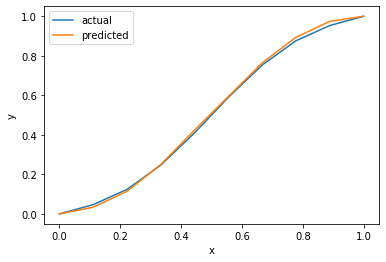

In [43]:
mse = np.mean((y - y_pred)**2,axis=1)

best_model_idx = np.argmin(mse)
print(best_model_idx)

plt.plot(x,y,label='actual')
plt.plot(x,y_pred[0,:],label='predicted')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()